In [14]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
shots = 10_000

# Exercise a)

In [85]:
qc = QuantumCircuit(5)
qc.h([0,1,2,3])
qc.cx([0,1,2,3],[4,4,4,4])
qc.cz([0,1,2,3,4],[1,2,3,4,0])
qc.save_statevector()
qc.draw()         

┌───┐                              statevector 
q_0: ┤ H ├──■─────────■──────────────■───────░──────
     ├───┤  │         │              │       ░      
q_1: ┤ H ├──┼────■────■────■─────────┼───────░──────
     ├───┤  │    │         │         │       ░      
q_2: ┤ H ├──┼────┼────■────■───■─────┼───────░──────
     ├───┤  │    │    │        │     │       ░      
q_3: ┤ H ├──┼────┼────┼────■───■──■──┼───────░──────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐    │  │       ░      
q_4: ─────┤ X ├┤ X ├┤ X ├┤ X ├────■──■───────░──────
          └───┘└───┘└───┘└───┘               ░

In [86]:
statevector = AerSimulator(method="statevector", shots=shots).run(qc).result().get_statevector()
statevector.draw(output='latex')


<IPython.core.display.Latex object>

# Exercise b)

In [87]:
qc = QuantumCircuit(5)
qc.x(4)
qc.h([0,1,2,3])
qc.cx([0,1,2,3],[4,4,4,4])
qc.cz([0,1,2,3,4],[1,2,3,4,0])
qc.save_statevector()
qc.draw()       
statevector = AerSimulator(method="statevector", shots=shots).run(qc).result().get_statevector()
statevector.draw(output='latex')  

<IPython.core.display.Latex object>

In [88]:
qc = QuantumCircuit(5)
qc.h([0,1,2,3])
qc.cx([0,1,2,3],[4,4,4,4])
qc.cz([0,1,2,3,4],[1,2,3,4,0])
qc.x([0,1,2,3,4])
qc.save_statevector()
qc.draw()       
statevector = AerSimulator(method="statevector", shots=shots).run(qc).result().get_statevector()
statevector.draw(output='latex') 

<IPython.core.display.Latex object>

same up to global phase

# Exercise c)

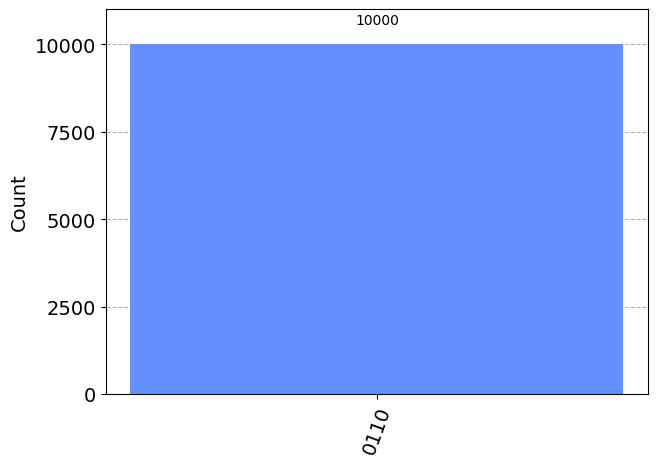

In [97]:
def gen5qubit_with_error(loc, error):
    qc = QuantumCircuit(9,4)
    qc.h([0,1,2,3])
    qc.cx([0,1,2,3],[4,4,4,4])
    qc.cz([0,1,2,3,4],[1,2,3,4,0])
    qc.h([5,6,7,8])
    # error here
    if error == "x":
        qc.x(loc)
    elif error == "y":
        qc.y(loc)
    elif error == "z":
        qc.z(loc)
    qc.barrier()
    # s1
    qc.cx([5,5],[0,3])
    qc.cz([5,5],[1,2])
    # s2
    qc.cx([6,6],[1,4])
    qc.cz([6,6],[2,3])
    # s3
    qc.cx([7,7],[0,2])
    qc.cz([7,7],[3,4])
    # s4
    qc.cx([8,8],[1,3])
    qc.cz([8,8],[0,4])

    qc.barrier()
    qc.h([5,6,7,8])

    qc.measure([5,6,7,8],[0,1,2,3])
    return qc


qc = gen5qubit_with_error(3, 'x')

# qc.draw(output='mpl')       

result = AerSimulator(method="statevector", shots=shots).run(qc).result().get_counts(qc)
plot_histogram(result)
# statevector.draw(output='latex') 

# Exercise d)

In [99]:
syndromes = {}
for i in range(5):
    for p in ['x','y','z']:
        qc = gen5qubit_with_error(i, p)
        result = AerSimulator(method="statevector", shots=shots).run(qc).result().get_counts(qc)
        for item in result.items():
            syndromes[(p,i)] = item[0]
            
print(syndromes)
            

{('x', 0): '1000', ('y', 0): '1101', ('z', 0): '0101', ('x', 1): '0001', ('y', 1): '1011', ('z', 1): '1010', ('x', 2): '0011', ('y', 2): '0111', ('z', 2): '0100', ('x', 3): '0110', ('y', 3): '1111', ('z', 3): '1001', ('x', 4): '1100', ('y', 4): '1110', ('z', 4): '0010'}


From this dictionary we see that e.g. Z on qubit 0 leads to the syndrome 0101, so Stabilizers $S_2$ and $S_4$ are violated.

The Syndromes are all unique.
The trivial error has the trivial Syndrome 0000.

The five qubit code is called the perfect code due to its near optimal encoding rate and distance.

# Exercise e)